In [1]:
import pandas as pd

In [2]:
from sklearn.feature_extraction.text import CountVectorizer
v = CountVectorizer()

In [3]:
v.fit(['Thor hathodawala is looking for a job'])

CountVectorizer()

In [4]:
v.vocabulary_

{'thor': 5, 'hathodawala': 1, 'is': 2, 'looking': 4, 'for': 0, 'job': 3}

In [5]:
v = CountVectorizer(ngram_range=(1,3))

In [6]:
v.fit(['Thor hathodawala is looking for a job'])

CountVectorizer(ngram_range=(1, 3))

In [7]:
v.vocabulary_

{'thor': 12,
 'hathodawala': 2,
 'is': 5,
 'looking': 9,
 'for': 0,
 'job': 8,
 'thor hathodawala': 13,
 'hathodawala is': 3,
 'is looking': 6,
 'looking for': 10,
 'for job': 1,
 'thor hathodawala is': 14,
 'hathodawala is looking': 4,
 'is looking for': 7,
 'looking for job': 11}

In [8]:
corpus = [
    'thor ate pizza',
    'loki is tall',
    'loki is eating pizza'
]

In [9]:
import spacy

nlp = spacy.load('en_core_web_sm')

def preprocess(text):
    doc = nlp(text)
    
    filtered_tokens = []
    
    for token in doc:
        if token.is_stop or token.is_punct:
            continue
        filtered_tokens.append(token.lemma_)
    return ' '.join(filtered_tokens)


preprocess('loki is eating pizza') 

'loki eat pizza'

In [10]:
corpus_processed = [preprocess(text) for text in corpus]

In [11]:
v = CountVectorizer(ngram_range=(1,3))

In [12]:
v.fit(corpus_processed)

CountVectorizer(ngram_range=(1, 3))

In [13]:
v.vocabulary_

{'thor': 8,
 'eat': 0,
 'pizza': 6,
 'thor eat': 9,
 'eat pizza': 1,
 'thor eat pizza': 10,
 'loki': 2,
 'tall': 7,
 'loki tall': 5,
 'loki eat': 3,
 'loki eat pizza': 4}

In [14]:
v.transform(['thor eat pizza']).toarray()

array([[1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1]], dtype=int64)

## News Category Classification Problem

In [15]:
df=pd.read_json('news_dataset.json')

In [16]:
df.head()

,text,category
0,Watching Schrödinger's Cat Die University of C...,SCIENCE
1,WATCH: Freaky Vortex Opens Up In Flooded Lake,SCIENCE
2,Entrepreneurs Today Don't Need a Big Budget to...,BUSINESS
3,These Roads Could Recharge Your Electric Car A...,BUSINESS
4,Civilian 'Guard' Fires Gun While 'Protecting' ...,CRIME


In [17]:
df.shape

(12695, 2)

In [18]:
df.category.value_counts()

BUSINESS    4254
SPORTS      4167
CRIME       2893
SCIENCE     1381
Name: category, dtype: int64

In [19]:
min_samples = 1381

df_business=df[df.category=='BUSINESS'].sample(min_samples, random_state=2022)
df_sports=df[df.category=='SPORTS'].sample(min_samples, random_state=2022)
df_crimes=df[df.category=='CRIME'].sample(min_samples, random_state=2022)
df_science=df[df.category=='SCIENCE'].sample(min_samples, random_state=2022)

In [20]:
df_balanced=pd.concat([df_business,df_sports,df_crimes,df_science], axis=0)

In [21]:
df_balanced.category.value_counts()

BUSINESS    1381
SPORTS      1381
CRIME       1381
SCIENCE     1381
Name: category, dtype: int64

In [22]:
df_balanced['category_num'] = df_balanced.category.map({
    'BUSINESS': 0,
    'SPORTS': 1,
    'CRIME': 2,
    'SCIENCE': 3
})

In [23]:
df_balanced

,text,category,category_num
11967,GCC Business Leaders Remain Confident in the F...,BUSINESS,0
2912,From the Other Side; an Honest Review from Emp...,BUSINESS,0
3408,"Mike McDerment, CEO of FreshBooks, Talks About...",BUSINESS,0
502,How to Market Your Business While Traveling th...,BUSINESS,0
5279,How to Leverage Intuition in Decision-making I...,BUSINESS,0
...,...,...,...
2178,Aquarium To Monitor Animals' Behavior Changes ...,SCIENCE,3
5682,How Google Glass Could Save Lives In The Hospi...,SCIENCE,3
1643,Honda's Gravity Modification Research For us A...,SCIENCE,3
11428,EVERYONE Loves Alternative Facts THE POWER OF ...,SCIENCE,3


In [24]:
from sklearn.model_selection import train_test_split
X_train, x_test,y_train,y_test=train_test_split(df_balanced.text,
                                                df_balanced.category_num,
                                                test_size=0.2,
                                                random_state=2022,
                                                stratify=df_balanced.category_num
                                               )

In [25]:
y_train.value_counts()

3    1105
2    1105
0    1105
1    1104
Name: category_num, dtype: int64

In [26]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [27]:
clf = Pipeline([
    ('vectorizer_bow', CountVectorizer()),
    ('Multi NB', MultinomialNB())
])
clf.fit(X_train,y_train)

Pipeline(steps=[('vectorizer_bow', CountVectorizer()),
                ('Multi NB', MultinomialNB())])

In [28]:
y_pred=clf.predict(x_test)

In [29]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.87      0.75      0.81       321
           1       0.80      0.93      0.86       240
           2       0.90      0.83      0.86       300
           3       0.80      0.90      0.85       244

    accuracy                           0.84      1105
   macro avg       0.84      0.85      0.84      1105
weighted avg       0.85      0.84      0.84      1105



In [30]:
clf = Pipeline([
    ('vectorizer_bow', CountVectorizer(ngram_range=(1,2))),
    ('Multi NB', MultinomialNB())
])
clf.fit(X_train,y_train)
y_pred=clf.predict(x_test)
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.90      0.69      0.78       361
           1       0.74      0.95      0.83       217
           2       0.88      0.82      0.85       295
           3       0.78      0.92      0.84       232

    accuracy                           0.82      1105
   macro avg       0.82      0.85      0.83      1105
weighted avg       0.84      0.82      0.82      1105



In [31]:
x_test[:5]

3716     African Nation Slaps Exxon With Fine Nearly 7 ...
608      These Cringe-Worthy Stories Show It Can Be Har...
11172    LISTEN: The Accidental Discovery That Proved T...
1346     Build Loyalty -- The Cost -- $00.00 Remember y...
1356     Man Killed By Michigan Police Wasn't Targeting...
Name: text, dtype: object

In [32]:
y_test[:5]

3716     0
608      3
11172    3
1346     0
1356     2
Name: category_num, dtype: int64

In [33]:
y_pred[:5]

array([0, 0, 3, 0, 2], dtype=int64)

 BUSINESS: 0,
 SPORTS: 1,
 CRIME: 2,
 SCIENCE: 3

In [34]:
df_balanced['preprocessed_txt']=df_balanced.text.apply(preprocess)

In [35]:
df_balanced.head()

,text,category,category_num,preprocessed_txt
11967,GCC Business Leaders Remain Confident in the F...,BUSINESS,0,GCC Business Leaders remain Confident Face Reg...
2912,From the Other Side; an Honest Review from Emp...,BUSINESS,0,Honest Review employee wake morning love impor...
3408,"Mike McDerment, CEO of FreshBooks, Talks About...",BUSINESS,0,Mike McDerment ceo FreshBooks Talks give build...
502,How to Market Your Business While Traveling th...,BUSINESS,0,market business travel World recently amazing ...
5279,How to Leverage Intuition in Decision-making I...,BUSINESS,0,Leverage intuition decision making feel safe r...


In [36]:
from sklearn.model_selection import train_test_split
X_train, x_test,y_train,y_test=train_test_split(df_balanced.preprocessed_txt,
                                                df_balanced.category_num,
                                                test_size=0.2,
                                                random_state=2022,
                                                stratify=df_balanced.category_num
                                               )

In [37]:
clf.fit(X_train,y_train)
y_pred=clf.predict(x_test)
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.88      0.80      0.84       304
           1       0.82      0.92      0.87       247
           2       0.92      0.83      0.87       306
           3       0.81      0.90      0.85       248

    accuracy                           0.86      1105
   macro avg       0.86      0.86      0.86      1105
weighted avg       0.86      0.86      0.86      1105



In [40]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[243,   8,  17,   8],
       [ 10, 228,  29,  10],
       [ 15,   2, 253,   6],
       [ 36,   9,   7, 224]], dtype=int64)

In [41]:
from matplotlib import pyplot as plt

In [42]:
import seaborn as sns

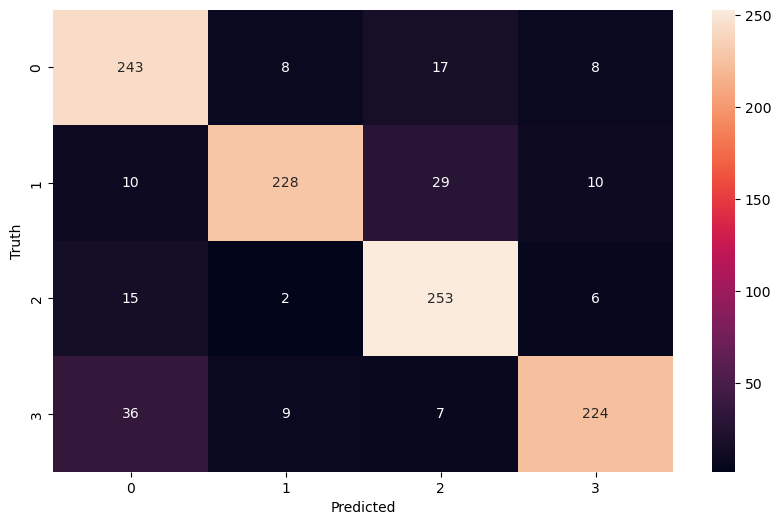

In [51]:
plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()